<a href="https://colab.research.google.com/github/Romilsonlonan/Zubale-Data-Analysi/blob/main/zubale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO ZUBALE 

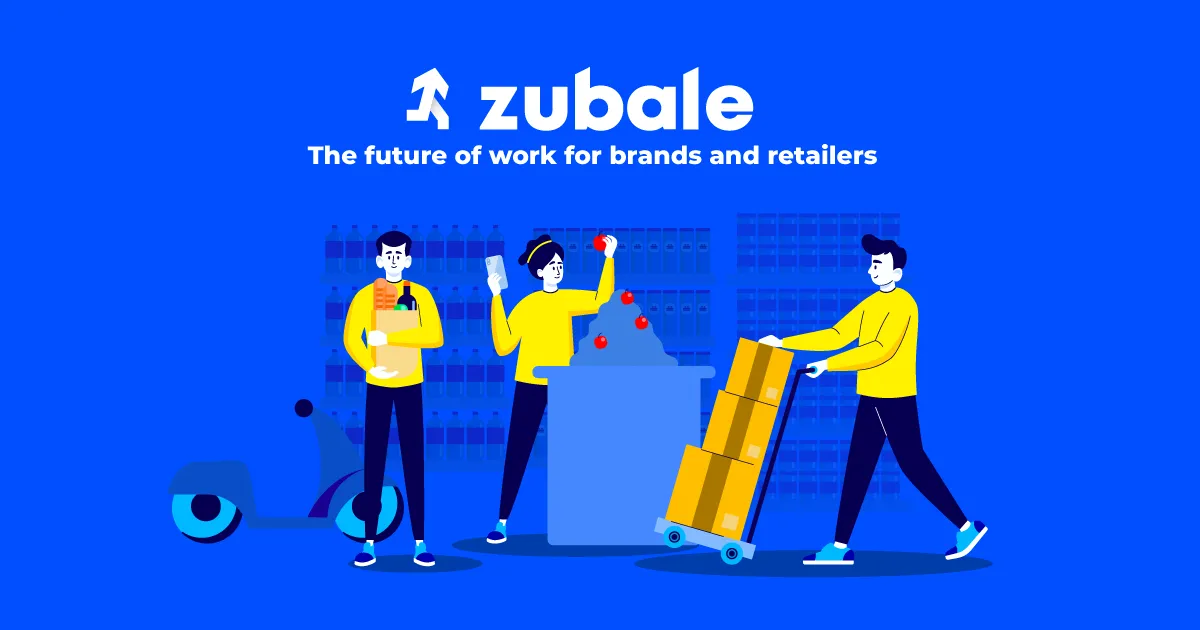

#TÍTULO: ANÁLISE EXPLORATÓRIA DE DADOS

#AUTOR: ROMILSON LUIS

Output: Relatório Relatório Zubale.html salvo em disco

* Prettydoc: html_pretty
* Theme: cayman
* Toc: yes
* highlith: github



# INTRODUÇÃO 

A elaboração de um relatório detalhado com informações estratégicas para o setor comercial é de vital importância para o sucesso de qualquer negócio. Nesse contexto, trabalharemos com um conjunto de dados cuidadosamente selecionados, que nos permitirão compreender melhor as necessidades das lojas, suas movimentações comerciais, clientes e tarefas internas e externas, no período entre os anos de 2022 a 2023. A partir dessas informações, poderemos identificar tendências, formular hipóteses e desenvolver estratégias alinhadas com os objetivos de nosso público-alvo. Para isso, é fundamental apresentar os dados de forma clara e analítica, com gráficos, tabelas e outros elementos visuais que facilitem a leitura e a compreensão do relatório.

# Bibliotecas importadas

* import pandas as pd
* import numpy as np
* import numpy as np
* import seaborn as sns
* import matplotlib.pyplot as plt
* import matplotlib_inline
* import datetime
* import zipfile
* from zipfile import ZipFile
* import seaborn as sns
* import matplotlib.pyplot as plt
* import plotly.graph_objects as go
* import plotly.express as px
* import plotly.graph_objects as go
* import plotly.express as px
* import bar_chart_race as bcr
* import matplotlib.ticker as mtick
* import pandas_profiling as pp
* from pandas_profiling import ProfileReport 

Total: 19

#Instalação de Pacotes

* !pip install bar_chart_race -q
* !pip install ffmpeg -q
* !pip install matplotlib-venn -q
* !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
* !pip install pandas-profiling -q

Total: 5

# Variáveis Importantes Criadas(dir())

* df 
* faltantes_percentual 
* df_2022_2023 
* loja_super_baratao  
* df_desempenho_bcr
* loja_mercado_marisol
* loja_mercado_preco_baixo
* mes_max_negado
* ordens_mensais
* ordens_mercado
* pedidos_por_ano_loja
* pedidos_unicos
* percentual_de_rejeição
* qtde_pedidos_unicos
* total_tarefas_lojas
* usuarios_dez_22_23
* var_percentual

Total: 17

In [224]:
#from google.colab import drive

In [319]:
from google.colab import files
uploaded = files.upload()

Saving zubale.ipynb to zubale.ipynb


In [225]:
# importando a biblioteca pandas 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import datetime
import zipfile
from zipfile import ZipFile

In [226]:
# Criar variável / processar todo o arquivo
df = pd.read_excel("/content/zubale.xlsx", 
                 decimal='.', 
                 header=0,
                 index_col=None,
                 na_values=False
                 )


In [227]:
# Lendo as duas primeiras linhas 
df.head(2)

Unnamed: 0  Date Date  User Phone Number  Brand ID  \
0           1 2023-02-28      5571981419571       706   
1           2 2023-02-28      5571981419571       706   

                   Brand Name     Store Name  Order Number  \
0  Atacado e Varejo Separador  Super Baratão   1125756.00%   
1  Atacado e Varejo Separador  Super Baratão   1125785.00%   

  Orden revisada (Yes / No) Orden aprobada (Yes / No)  Submission Amount  \
0                       Yes                       Yes              4.50%   
1                       Yes                       Yes              4.50%   

   Quantity SKU  Quantity Itens  
0        66.00%         120.00%  
1        35.00%          71.00%

In [228]:
# Ler as ultimas 2 linhas 
df.tail(2)

Unnamed: 0  Date Date  User Phone Number  Brand ID  \
11933       11934 2022-11-01      5579996887969       706   
11934       11935 2022-11-01      5579996887969       706   

                       Brand Name       Store Name  Order Number  \
11933  Atacado e Varejo Separador  Mercado Marisol   1101126.00%   
11934  Atacado e Varejo Separador  Mercado Marisol   1101193.00%   

      Orden revisada (Yes / No) Orden aprobada (Yes / No)  Submission Amount  \
11933                       Yes                       Yes              4.00%   
11934                       Yes                       Yes              4.00%   

       Quantity SKU  Quantity Itens  
11933         1.00%          10.00%  
11934        19.00%          38.00%

# Renomeando colunas

In [229]:
# Usando o método rename
df.rename(columns={'Unnamed: 0' : 'ID_Service',  
                   'User Phone Number' : 'User_Phone_Number', 
                   'Brand ID' : 'Brand_ID', 
                   'Brand Name' : 'Brand_Name', 
                   'Store Name' : 'Store_Name', 
                   'Order Number' : 'Order_Number', 
                   'Orden revisada (Yes / No)' : 'Orden_revisada(Yes/No)', 
                   'Orden aprobada (Yes / No)' : 'Orden_aprobada(Yes/No)', 
                   'Submission Amount' : 'Submission_Amount', 
                   'Quantity SKU' : 'Quantity_SKU', 
                   'Quantity Itens' : 'Quantity_Itens'}, inplace=True)

In [230]:
# Visualizando o conjunto de dados e coletando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Service              11935 non-null  int64         
 1   Date Date               11935 non-null  datetime64[ns]
 2   User_Phone_Number       11935 non-null  int64         
 3   Brand_ID                11935 non-null  int64         
 4   Brand_Name              11935 non-null  object        
 5   Store_Name              11935 non-null  object        
 6   Order_Number            11934 non-null  float64       
 7   Orden_revisada(Yes/No)  11935 non-null  object        
 8   Orden_aprobada(Yes/No)  11935 non-null  object        
 9   Submission_Amount       11935 non-null  float64       
 10  Quantity_SKU            11934 non-null  float64       
 11  Quantity_Itens          11934 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), ob

#Verificando valores missing

<Axes: >

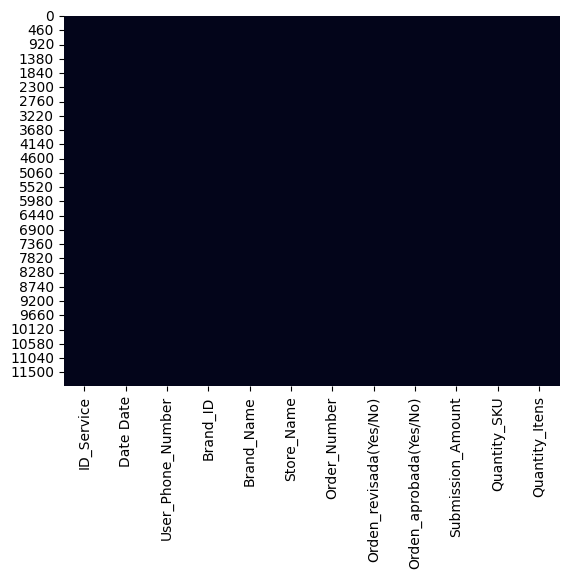

In [231]:
import seaborn as sns
# Verificando dados faltantes com gráfico 
sns.heatmap(df.isnull(), cbar=False)

In [232]:
# Somando os dados faltantes
df.isnull().sum()

ID_Service                0
Date Date                 0
User_Phone_Number         0
Brand_ID                  0
Brand_Name                0
Store_Name                0
Order_Number              1
Orden_revisada(Yes/No)    0
Orden_aprobada(Yes/No)    0
Submission_Amount         0
Quantity_SKU              1
Quantity_Itens            1
dtype: int64

In [233]:
# Percentual de dados faltantes 
faltantes_percentual = (df.isnull().sum() / len(df['Order_Number']))*100
print(faltantes_percentual)

ID_Service               0.00%
Date Date                0.00%
User_Phone_Number        0.00%
Brand_ID                 0.00%
Brand_Name               0.00%
Store_Name               0.00%
Order_Number             0.01%
Orden_revisada(Yes/No)   0.00%
Orden_aprobada(Yes/No)   0.00%
Submission_Amount        0.00%
Quantity_SKU             0.01%
Quantity_Itens           0.01%
dtype: float64


In [234]:
# O method ffill considera a visinhança dos dados e vai atribuir os valores aos dados ausentes 
df.fillna(method="ffill", inplace=True)

In [235]:
# Visualizando dados faltantes
df.isnull().sum()

ID_Service                0
Date Date                 0
User_Phone_Number         0
Brand_ID                  0
Brand_Name                0
Store_Name                0
Order_Number              0
Orden_revisada(Yes/No)    0
Orden_aprobada(Yes/No)    0
Submission_Amount         0
Quantity_SKU              0
Quantity_Itens            0
dtype: int64

In [236]:
# conjunto de informações de estatísticas descritivas
df.describe().T

count              mean            std  \
ID_Service        11935.00%          5968.00%       3445.48%   
User_Phone_Number 11935.00% 5571843704126.39% 3465064804.39%   
Brand_ID          11935.00%           706.00%          0.00%   
Order_Number      11935.00%       1128377.27%     494399.16%   
Submission_Amount 11935.00%             4.35%          0.23%   
Quantity_SKU      11935.00%            23.41%         21.77%   
Quantity_Itens    11935.00%           216.46%      12308.62%   

                                min               25%               50%  \
ID_Service                    1.00%          2984.50%          5968.00%   
User_Phone_Number 5511933849636.00% 5571983209257.00% 5571986677161.00%   
Brand_ID                    706.00%           706.00%           706.00%   
Order_Number                109.00%       1106581.00%       1112984.00%   
Submission_Amount             4.00%             4.00%             4.50%   
Quantity_SKU                  1.00%             8.00%            18.00%   
Quantity_Itens                1.00%            22.00%            44.00%   

                                75%               max  
ID_Service                 8951.50%         11935.00%  
User_Phone_Number 5571988751676.00% 5579996930108.00%  
Brand_ID                    706.00%           706.00%  
Order_Number            1119289.00%      11343282.00%  
Submission_Amount             4.50%             4.50%  
Quantity_SKU                 33.00%           868.00%  
Quantity_Itens               78.00%       1108641.00%

#Gerando novas colunas para data ano, mês e dia.

In [237]:
# Formatando colunas com datas
#df['Date Date'] = pd.to_datetime(df['Date Date'], format='%d/%m/%Y')

In [238]:
# Criando coluna ano 
df['Ano'] = pd.DatetimeIndex(df['Date Date']).year

In [239]:
# Criando coluna mês
df['Mes'] = pd.DatetimeIndex(df['Date Date']).month

In [240]:
# Criando coluna Dia
df['Dia'] = pd.DatetimeIndex(df['Date Date']).day

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Service              11935 non-null  int64         
 1   Date Date               11935 non-null  datetime64[ns]
 2   User_Phone_Number       11935 non-null  int64         
 3   Brand_ID                11935 non-null  int64         
 4   Brand_Name              11935 non-null  object        
 5   Store_Name              11935 non-null  object        
 6   Order_Number            11935 non-null  float64       
 7   Orden_revisada(Yes/No)  11935 non-null  object        
 8   Orden_aprobada(Yes/No)  11935 non-null  object        
 9   Submission_Amount       11935 non-null  float64       
 10  Quantity_SKU            11935 non-null  float64       
 11  Quantity_Itens          11935 non-null  float64       
 12  Ano                     11935 non-null  int64 

# Consultando os nomes das lojas cadastradas





In [242]:
# Criando um dataframe com as colunas Store_Name e Brand_ID sem duplicatas
df_lojas = df[['Store_Name', 'Brand_ID']].drop_duplicates()

# Transformando o dataframe em um dicionário
lojas_dict = df_lojas.set_index('Store_Name')['Brand_ID'].to_dict()

# Imprimindo o resultado
print(lojas_dict)

{'Super Baratão': 706, 'Mercado Preço Baixo': 706, 'Mercado Marisol': 706}


# Realizando Quary nas lojas

In [243]:
# Atribuindo uma variável para consulta
loja_super_baratao = df[df["Store_Name"] == "Super Baratão"]
loja_super_baratao

ID_Service  Date Date  User_Phone_Number  Brand_ID  \
0               1 2023-02-28      5571981419571       706   
1               2 2023-02-28      5571981419571       706   
2               3 2023-02-28      5571981419571       706   
3               4 2023-02-28      5571981419571       706   
4               5 2023-02-28      5571981419571       706   
...           ...        ...                ...       ...   
11927       11928 2022-11-01      5575998128233       706   
11928       11929 2022-11-01      5575998128233       706   
11929       11930 2022-11-01      5575998128233       706   
11930       11931 2022-11-01      5575998128233       706   
11931       11932 2022-11-01      5575998128233       706   

                       Brand_Name     Store_Name  Order_Number  \
0      Atacado e Varejo Separador  Super Baratão   1125756.00%   
1      Atacado e Varejo Separador  Super Baratão   1125785.00%   
2      Atacado e Varejo Separador  Super Baratão   1125789.00%   
3      Atacado e Varejo Separador  Super Baratão   1125882.00%   
4      Atacado e Varejo Separador  Super Baratão   1125883.00%   
...                           ...            ...           ...   
11927  Atacado e Varejo Separador  Super Baratão   1101310.00%   
11928  Atacado e Varejo Separador  Super Baratão   1101315.00%   
11929  Atacado e Varejo Separador  Super Baratão   1101320.00%   
11930  Atacado e Varejo Separador  Super Baratão   1101322.00%   
11931  Atacado e Varejo Separador  Super Baratão   1101328.00%   

      Orden_revisada(Yes/No) Orden_aprobada(Yes/No)  Submission_Amount  \
0                        Yes                    Yes              4.50%   
1                        Yes                    Yes              4.50%   
2                        Yes                    Yes              4.50%   
3                        Yes                    Yes              4.50%   
4                        Yes                    Yes              4.50%   
...                      ...                    ...                ...   
11927                    Yes                    Yes              4.00%   
11928                    Yes                    Yes              4.00%   
11929                    Yes                    Yes              4.00%   
11930                    Yes                    Yes              4.00%   
11931                    Yes                    Yes              4.00%   

       Quantity_SKU  Quantity_Itens   Ano  Mes  Dia  
0            66.00%         120.00%  2023    2   28  
1            35.00%          71.00%  2023    2   28  
2            33.00%         124.00%  2023    2   28  
3            18.00%          33.00%  2023    2   28  
4            33.00%         100.00%  2023    2   28  
...             ...             ...   ...  ...  ...  
11927         4.00%          10.00%  2022   11    1  
11928        14.00%          18.00%  2022   11    1  
11929        13.00%          97.00%  2022   11    1  
11930        14.00%         103.00%  2022   11    1  
11931        18.00%          41.00%  2022   11    1  

[5767 rows x 15 columns]

# 1 - Quantos pedidos - únicos - a loja Super Baratão teve no mês de Dezembro?

In [244]:
# O objetivo do comando BETWEEN é selecionar os dados que fazem parte de um intervalo. Nesse caso, os pedidos de dezembro de 2022 e 2023
# Neste caso, ainda estamos no mês de abril logo não teremos dados para dezembro de 2023, mas fica como ilustração que podemos pegar varios 
# varios anos e comparar o mês que desejarmos.
pedidos_unicos = loja_super_baratao[(loja_super_baratao['Mes'] == 12) & (loja_super_baratao['Ano'].between(2022, 2023))]


In [245]:
qtde_pedidos_unicos = pedidos_unicos['Quantity_SKU'].nunique()
qtde_pedidos_unicos

104

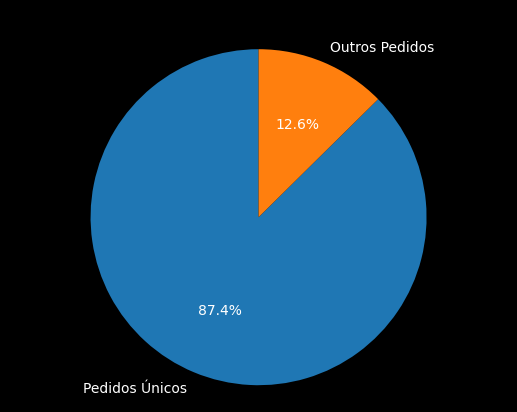

In [246]:
import matplotlib.pyplot as plt

labels = ['Pedidos Únicos', 'Outros Pedidos']
sizes = [qtde_pedidos_unicos, loja_super_baratao['Quantity_SKU'].nunique() - qtde_pedidos_unicos]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
ax1.axis('equal')
plt.title('Quantidade de Pedidos Únicos em Dezembro de 2022-2023')
fig1.set_facecolor('black')
plt.show()

# 2 - Qual foi o mês com maior percentual de rejeição da loja Mercado Marisol?

In [247]:
# Atribuindo uma variável para consulta
ordens_mercado = df[(df['Store_Name'] == 'Mercado Marisol') &
                    (df['Ano'].isin([2022, 2023]))]

In [248]:
# Agrupando os dados por mês e ordem aprovada (Yes/No) e contando o número de ordens em cada categoria um DataFrame com o número de ordens aprovadas e negadas em cada mês
ordens_mensais = ordens_mercado.groupby(['Mes', 'Orden_aprobada(Yes/No)'])['ID_Service'].count().unstack()
ordens_mensais

Orden_aprobada(Yes/No)  No  Yes
Mes                            
1                       15  513
2                       17  579
11                      54  556
12                       5  567

In [249]:
# Calculando a porcentagem de ordens negadas em cada mês, o resultado será um DataFrame com o número total de ordens aprovadas e negadas em cada mês, e a porcentagem de ordens negadas

ordens_mensais['Percent_Negado'] = ordens_mensais['No'] / (ordens_mensais['No'] + ordens_mensais['Yes']) * 100

In [250]:
# Encontrando o mês com o maior percentual de ordens negadas.

mes_max_negado = ordens_mensais['Percent_Negado'].idxmax()
mes_max_negado

11

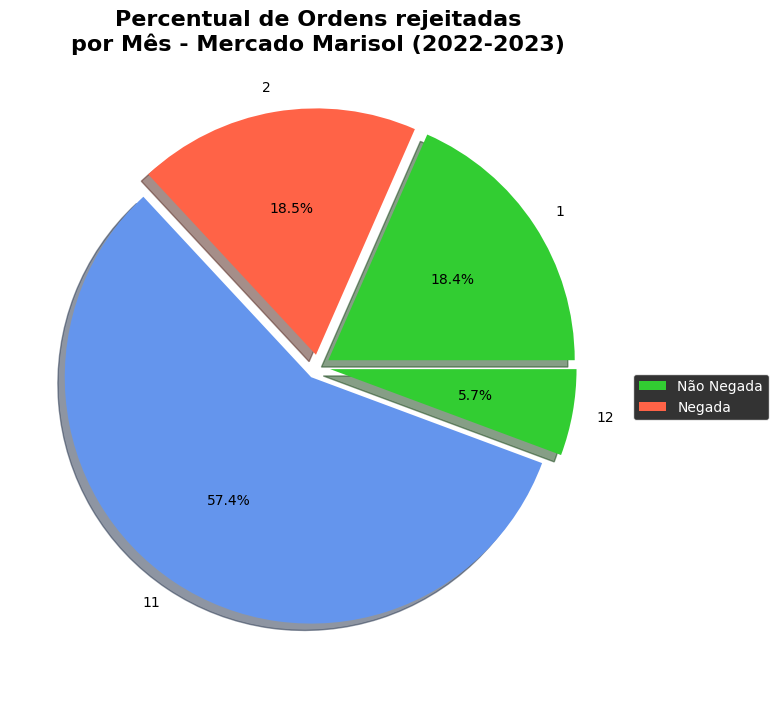

In [251]:
import matplotlib.pyplot as plt

# Acessando a coluna Percent_Negado do DataFrame ordens_mensais
percentual_de_rejeição = ordens_mensais['Percent_Negado']

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 8))
cores = ['limegreen', 'tomato', 'cornflowerblue']
explode = [0.05] * len(percentual_de_rejeição) # explode todas as fatias

# Desenho do gráfico de pizza (pie chart)
ax.pie(percentual_de_rejeição, labels=percentual_de_rejeição.index, autopct='%1.1f%%', explode=explode, colors=cores, shadow=True)

# Configuração de título, subtítulo e legenda
ax.set_title('Percentual de Ordens rejeitadas\npor Mês - Mercado Marisol (2022-2023)', fontsize=16, fontweight='bold', color='black')
ax.set_xlabel(f'Mês com maior percentual de ordens rejeitadas: {mes_max_negado}', fontsize=12, fontweight='bold', color='white')
ax.legend(['Não Negada', 'Negada'], bbox_to_anchor=(1, 0.5), facecolor='black', edgecolor='white', labelcolor='white')

# Configuração da cor de fundo do gráfico
ax.set_facecolor('black')

# Exibição do gráfico
plt.show()

# 3. Quantos usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro?

In [252]:
import matplotlib.pyplot as plt

# Atribuindo uma variável para consulta
loja_mercado_preco_baixo = df[(df["Store_Name"] == "Mercado Preço Baixo") & 
(df["Ano"].isin([2022, 2023])) &
(df["Mes"] == 12)]

In [253]:
# número de pedidos de cada usuário no mês de dezembro
usuarios_dez_22_23 = loja_mercado_preco_baixo['Quantity_Itens'].nunique()
print(f"{usuarios_dez_22_23} usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro entre os anos de 2022 e 2023.")


167 usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro entre os anos de 2022 e 2023.


In [254]:
import plotly.graph_objs as go

values_2022 = loja_mercado_preco_baixo[loja_mercado_preco_baixo['Ano'] == 2022]['Quantity_Itens']
values_2023 = loja_mercado_preco_baixo[loja_mercado_preco_baixo['Ano'] == 2023]['Quantity_Itens']

if len(values_2022) > 0:
    # Criando lista com os valores para o histograma
    data = [len(values_2022), 0]
    labels = ['Dez/2022', 'Dez/2023']
    colors = ['#1f77b4', '#d6d6d6']
    if len(values_2023) == 0:
        labels[1] += " (sem vendas)" # Adiciona a especificação em vermelho
        
    fig = go.Figure()
    fig.add_trace(go.Pie(
        labels=labels, 
        values=data,
        hole=.3, # Define o raio do furo central da rosca
        marker=dict(colors=colors), # Define as cores das fatias
        textinfo='label+percent+value', # Define a informação que vai aparecer na rosca
        textposition='inside'
    ))

    fig.update_layout(
        title='167 pedidos em Dez/2022 e 0 pedidos em Dez/2023',
        title_font=dict(size=20, color='white'), # Define a cor e o tamanho da fonte do título
        font=dict(color='white'), # Define a cor da fonte das labels
        paper_bgcolor='black' # Define a cor de fundo do gráfico
    )

    fig.show()


# 4. Construa um gráfico (e compartilhe comigo!) com o total de pedidos de 2022 e 2023. O gráfico deve exibir o total de tarefas de cada loja individualmente

In [255]:
# Selecionar apenas pedidos dos anos de 2022 e 2023
df_2022_2023 = df[df['Ano'].isin([2022, 2023])]

In [256]:
import plotly.graph_objects as go
import plotly.express as px

# balanço de tarefas nas lojas Super Baratão, Mercado Preço Baixo e Mercado Marisol
loja_super_baratao = df_2022_2023[df_2022_2023['Store_Name'] == 'Super Baratão']
loja_mercado_preco_baixo = df_2022_2023[df_2022_2023['Store_Name'] == 'Mercado Preço Baixo']
loja_mercado_marisol = df_2022_2023[df_2022_2023['Store_Name'] == 'Mercado Marisol']

# Agrupando as tarefas feitas por cada loja em cada ano
total_tarefas_lojas = pd.concat([loja_super_baratao, loja_mercado_preco_baixo, loja_mercado_marisol]).groupby(['Store_Name','Ano']).agg({
'Order_Number': 'sum',
'Quantity_Itens': 'sum',
'Submission_Amount': 'sum'
})

# Resetando os índices do DataFrame
total_tarefas_lojas = total_tarefas_lojas.reset_index()

# Transformando o DataFrame em um formato apropriado para o histograma
df_hist = total_tarefas_lojas.melt(id_vars=['Store_Name', 'Ano'], value_vars=['Order_Number', 'Quantity_Itens', 'Submission_Amount'], var_name='variavel', value_name='valor')


In [257]:
# Removendo os separadores de milhar e transformando as strings em números reais
df_hist.loc[:, 'valor'] = df_hist['valor'].astype(str).str.replace(',', '').astype(float)

# Adicionando as percentagens aos dados para o tooltip
for store_name in df_hist['Store_Name'].unique():
    for ano in df_hist['Ano'].unique():
        idx = (df_hist['Store_Name'] == store_name) & (df_hist['Ano'] == ano)
        total_tarefas = df_hist[idx]['valor'].astype(float).sum()
        df_hist.loc[idx, 'percentual'] = df_hist[idx]['valor'].astype(float) / total_tarefas * 100
        df_hist.loc[idx, 'total_tarefas'] = total_tarefas


# Customizando os valores do histograma
if 'valor' in df_hist.columns:
    df_hist.loc[:, 'valor'] = df_hist['valor'].apply(lambda x: "{:,.0f}".format(x))


In [258]:
# Gerando o gráfico de barras
fig = go.Figure()

for metric in df_hist['variavel'].unique():
    metric_data = df_hist[df_hist['variavel'] == metric]
    
    fig.add_trace(go.Bar(
        x=metric_data['Store_Name'],
        y=metric_data['valor'],
        name=metric,
        customdata=metric_data[['Store_Name', 'Ano', 'total_tarefas', 'percentual']],
        hovertemplate='<b>%{customdata[0]}</b><br>' \
            'Ano: %{customdata[1]}<br>' \
            'Tarefas: %{customdata[2]:,.0f}<br>' \
            'Percentual: %{customdata[3]:.2f}%<br>' \
            '<extra></extra>',
        texttemplate='%{y} (%{customdata[3]:.2f}%)',
        textposition='inside'
    ))

# Configurando as opções de visualização interativa
fig.update_xaxes(title='Lojas')
fig.update_yaxes(title='Total de pedidos e tarefas')
fig.update_layout(barmode='stack')

# Adicionando informações sobre a loja e o ano ao topo do gráfico
fig.add_layout_image(
dict(
source="https://raw.githubusercontent.com/plotly/brand-assets/master/dash-logo-new.png",
xref="paper", yref="paper",
x=0.5, y=1.15,
sizex=0.3, sizey=0.3,
xanchor="center", yanchor="middle"
)
)

# Adicionando título à parte superior do gráfico
fig.update_layout(title={
    'text': "Total de tarefas por lojas",
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font':{'size':35, 'color': 'white'},
    
},
paper_bgcolor='black',
plot_bgcolor='black'
)

# Exibindo o gráfico
fig.show()



In [259]:
# Agrupando as quantidades de itens feitos por cada loja em cada ano
total_itens_lojas = pd.concat([loja_super_baratao, loja_mercado_preco_baixo, loja_mercado_marisol]).groupby(['Store_Name','Ano']).agg({
'Order_Number': 'count',
'Quantity_Itens': 'sum',
'Submission_Amount': 'sum'
}).reset_index()

# Plotando o histograma de rosca interativo
fig = px.sunburst(total_itens_lojas, path=['Ano', 'Store_Name'], values='Quantity_Itens', color='Store_Name')

# Definindo layout do gráfico
fig.update_layout(
    title={
        'text': 'Total de Itens vendidos $',
        'font': {'color': 'white', 'size':25}
    },
    paper_bgcolor='black',
    plot_bgcolor='black'
)

fig.show()


# 5. Identifique o % de variação de pedidos - únicos - por loja no período ano contra ano

In [260]:
pedidos_por_ano_loja = df[df['Ano'].isin([2022, 2023])].groupby(['Ano', 'Store_Name'])['Quantity_SKU'].nunique().unstack()
pedidos_por_ano_loja.columns = ['Mercado Marisol', 'Mercado Preço Baixo', 'Super Baratão']


In [261]:
# Usando o método pct_change() para calcular a variação percentual entre os dois anos
var_percentual = pedidos_por_ano_loja.pct_change(axis=1).iloc[:, 1:] * 100
pd.options.display.float_format = '{:.2f}%'.format
print(f"Variação percentual dos pedidos únicos por loja:\n{var_percentual}")

Variação percentual dos pedidos únicos por loja:
      Mercado Preço Baixo  Super Baratão
Ano                                     
2022               18.99%         15.96%
2023               19.05%          7.00%


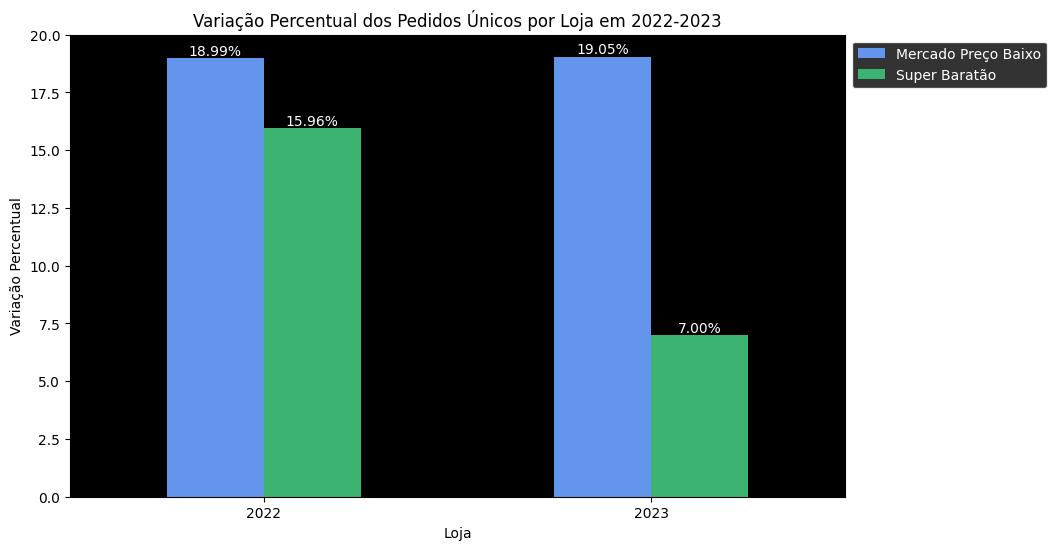

In [262]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Gerando o gráfico de barras detalhado

# Gera o histograma
ax = var_percentual.plot.bar(rot=0, figsize=(10,6), color=['cornflowerblue', 'mediumseagreen', 'orange'])
#ax.yaxis.set_major_formatter(yticks)
plt.xlabel('Loja', color='black')
plt.ylabel('Variação Percentual', color='black')
plt.title('Variação Percentual dos Pedidos Únicos por Loja em 2022-2023', color='black')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='black', edgecolor='white', labelcolor='white')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:.2f}%'.format(val) for val in i.datavalues], color='white')
ax.set_facecolor('black')
ax.tick_params(colors='black')
if 'Mercado Marisol' not in pedidos_por_ano_loja.columns:
    pedidos_por_ano_loja['Mercado Marisol'] = 0
plt.show()

# Arquivos

In [ ]:
#Verificando todos os arquivos disponíveis no drive
#!ls '/content/drive/My Drive/'

# Gerando relatório

In [303]:
!pip uninstall visions==0.7.5 -y -q 

In [305]:
!apt-get install visions==0.7.4 -q 

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package visions=


In [306]:
!pip install ydata-profiling visions==0.7.4 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 28.5 MB/s eta 0:00:00
ERROR: Cannot install visions==0.7.4 and visions[type-image-path]==0.7.5 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [283]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q


  Preparing metadata (setup.py) ... done


In [284]:
!pip install pandas-profiling -q

In [311]:
#Importando as bibliotecas
import pandas_profiling as pp
from pandas_profiling import ProfileReport 

In [323]:
#Gerando relatório resumido
profile = ProfileReport(df, title="Relatório Zulebale", html={'style':{'full_width':True}})

In [324]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [328]:
# Salvando o relatório no disco
profile.to_file(output_file='Relatório Zubale.html')
profile.to_file(output_file='/content/drive/MyDrive/ProjetosDataScience/data Projeto Zubale')
#profile.to_notebook_iframe()

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]